# Handwritten Digit Recognition


# Group Number: 02

# Nethsarani D.W.D. - EG/2020/4096

# Isanka J.R.A.U. - EG/2020/3974   

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Import training and testing files

In [3]:
# train_data = pd.read_csv(r"/kaggle/input/digit-recognizer/train.csv")
# test_data = pd.read_csv(r"/kaggle/input/digit-recognizer/test.csv")

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.shape #shape of the training data

(42000, 785)

In [5]:
test_data.shape #shape of the testing data

(28000, 784)

In [6]:
train_data.head() #structure and content of training data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.head()  #structure and content of testing data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Display the unique values and the number of unique values in the 'label' column of the 'train_data' DataFrame.
train_data['label'].unique(), train_data['label'].nunique()

(array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64), 10)

In [9]:
#Duplicate rows
duplicate_rows = train_data.duplicated().sum()

print("Count of duplicate rows:", duplicate_rows)

Count of duplicate rows: 0


In [10]:
#Checking for null values
null_values = train_data.isnull().sum()
print(null_values)  

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


# Describe the data

In [11]:
print(train_data.describe())

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0

In [12]:
print(test_data.describe())

        pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776  \
count  28000.0  28000.0  ...  28000.000000  28000.000000  28000.000000   
mean       0.0      0.0  ...      0.164607      0.073214      0.028036   
std        0.0      0.0  ...      5.473293      

In [13]:
x_train_1 = train_data.drop('label', axis=1)
y_train_1 = train_data['label']

x_test_1 = test_data

This is observation number 33307
This image is 9


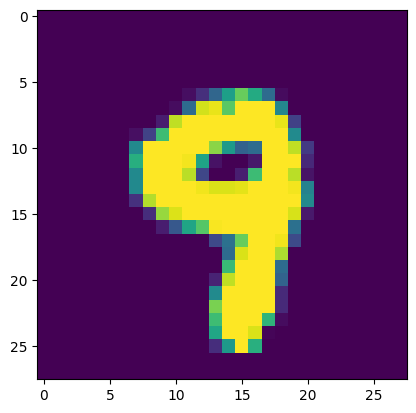

In [14]:
x_train_2 = x_train_1.values.reshape(-1, 28, 28, 1)
x_train_2.shape

index = randrange(42000)

plt.imshow(x_train_2[index])
print ("This is observation number " + str(index))
print ("This image is " + str(y_train_1[index]))

In [15]:
# Data Preprocessing
x_train_scaled = StandardScaler().fit_transform(x_train_1)
x_test_scaled = StandardScaler().fit_transform(x_test_1)

In [16]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_scaled, y_train_1, test_size=0.2, random_state=42)


In [17]:
# Logistic Regression with Adam optimizer
logistic_model = Sequential()
logistic_model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
logistic_model.add(Dense(10, activation='softmax'))
logistic_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Training Models

In [18]:
# Train the logistic regression model for 10 epochs
logistic_epochs = 10
logistic_history = logistic_model.fit(x_train, y_train, epochs=logistic_epochs, validation_data=(x_val, y_val))

Epoch 1/10


1050/1050 [==============================] - 4s 3ms/step - loss: 0.2739 - accuracy: 0.9230 - val_loss: 0.2037 - val_accuracy: 0.9445
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1144 - accuracy: 0.9673 - val_loss: 0.1777 - val_accuracy: 0.9529
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0722 - accuracy: 0.9782 - val_loss: 0.1468 - val_accuracy: 0.9625
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.1754 - val_accuracy: 0.9570
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0362 - accuracy: 0.9874 - val_loss: 0.1570 - val_accuracy: 0.9640
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0301 - accuracy: 0.9897 - val_loss: 0.1472 - val_accuracy: 0.9658
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0299 - accuracy: 0.9919 - val_loss: 0.1628 - val_accurac

In [19]:

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Results

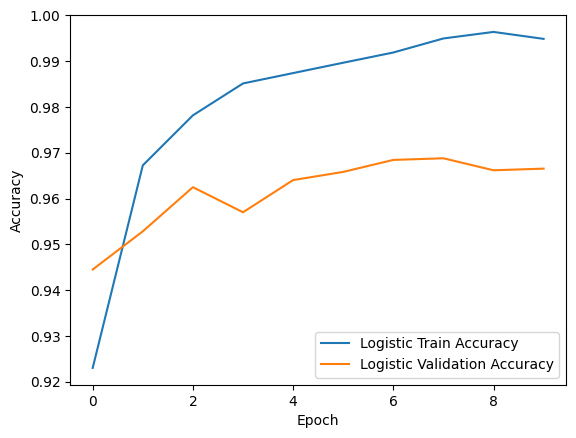

263/263 [==============================] - 0s 867us/step
Logistic Regression Validation Accuracy: 96.65%
Logistic Regression Validation Precision: 0.97


In [20]:
# Plot training history for logistic regression
plt.plot(logistic_history.history['accuracy'], label='Logistic Train Accuracy')
plt.plot(logistic_history.history['val_accuracy'], label='Logistic Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the logistic regression model on the validation set
logistic_val_predictions = np.argmax(logistic_model.predict(x_val), axis=1)
logistic_val_accuracy = accuracy_score(y_val, logistic_val_predictions)
logistic_val_precision = precision_score(y_val, logistic_val_predictions, average='weighted')

print("Logistic Regression Validation Accuracy: {:.2f}%".format(logistic_val_accuracy * 100))
print("Logistic Regression Validation Precision: {:.2f}".format(logistic_val_precision))

In [21]:
# Predictions on the validation set
knn_val_predictions = knn.predict(x_val)

# Calculate and print accuracy for KNN
knn_accuracy = accuracy_score(y_val, knn_val_predictions)
print("K-Nearest Neighbors Validation Accuracy: {:.2f}%".format(knn_accuracy * 100))

K-Nearest Neighbors Validation Accuracy: 94.01%


In [22]:
print(f"Logistic Regression Accuracy (Validation): {logistic_val_accuracy}")
print(f"K-Nearest Neighbors Accuracy (Validation): {knn_accuracy}")

Logistic Regression Accuracy (Validation): 0.9665476190476191
K-Nearest Neighbors Accuracy (Validation): 0.9401190476190476


This is the observation number: 3223 in the test dataset
The actual label for this image is: 7
The classification for this image using Logistic Regression is: 7
The classification for this image using K-Nearest Neighbors is: 7


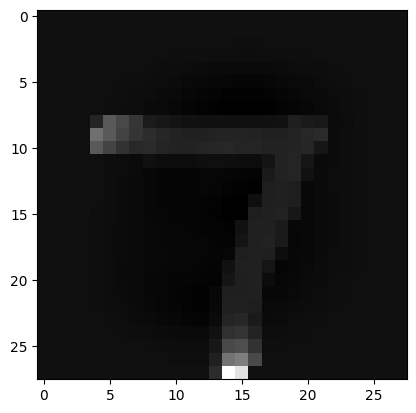

This is the observation number: 2398 in the test dataset
The actual label for this image is: 1
The classification for this image using Logistic Regression is: 1
The classification for this image using K-Nearest Neighbors is: 1


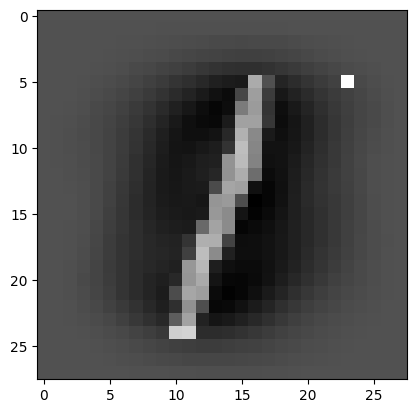

In [23]:
# Assuming x_val is the validation set
x_val_standardized = StandardScaler().fit_transform(x_val)
x_test_2 = x_val.reshape(-1, 28, 28, 1)
    
for i in range(2): 
    index_2 = randrange(4200)
    print("This is the observation number: " + str(index_2) +  " in the test dataset")
    print("The actual label for this image is: " + str(y_val.iloc[index_2]))
    print("The classification for this image using Logistic Regression is: " + str(logistic_val_predictions[index_2]))
    print("The classification for this image using K-Nearest Neighbors is: " + str(knn.predict(x_val)[index_2]))
    #plt.imshow(x_test_2[index_2].squeeze(), cmap='gray')
    plt.imshow(x_test_2[index_2].squeeze(), cmap='gray', interpolation='nearest')
    plt.show()

# Confusion Matrices

In [24]:
logistic_reg_confusion_matrix = metrics.confusion_matrix(y_val, logistic_val_predictions)
knn_confusion_matrix = metrics.confusion_matrix(y_val, knn_val_predictions)

Text(0.5, 58.7222222222222, 'Recognized Digits')

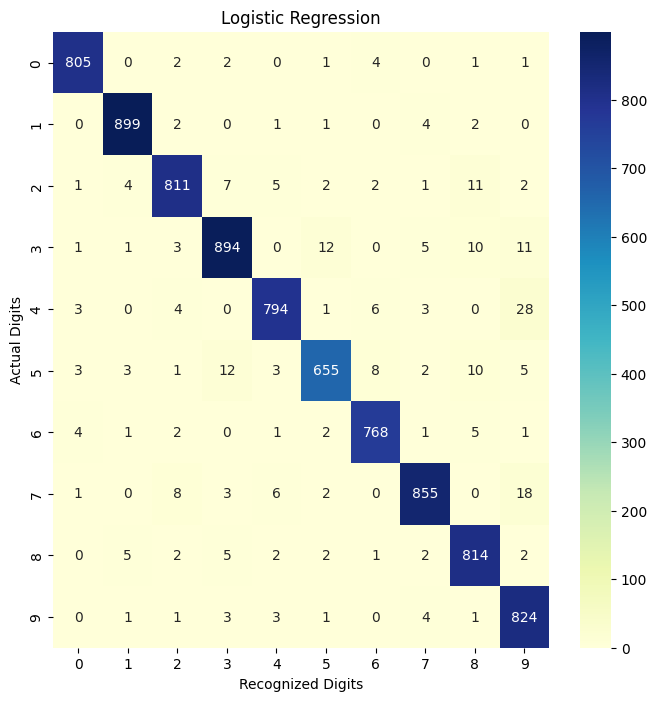

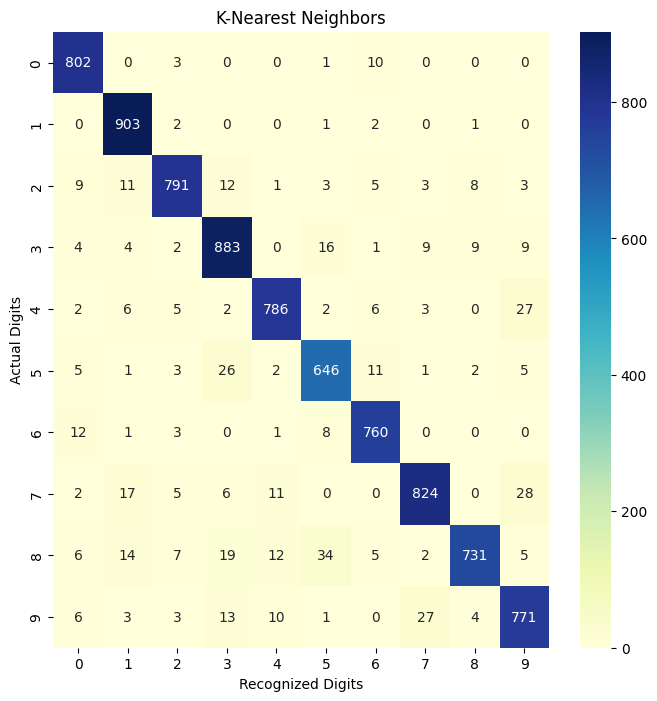

In [25]:
plt.figure(figsize = (8,8))
sns.heatmap(logistic_reg_confusion_matrix, annot = True, fmt='d', cmap='YlGnBu')
plt.title("Logistic Regression")
plt.ylabel("Actual Digits")
plt.xlabel("Recognized Digits")

plt.figure(figsize = (8,8))
sns.heatmap(knn_confusion_matrix, annot = True, fmt='d', cmap='YlGnBu')
plt.title("K-Nearest Neighbors")
plt.ylabel("Actual Digits")
plt.xlabel("Recognized Digits")